In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from scipy.sparse import lil_matrix
from sklearn import svm
from sklearn.decomposition import PCA

# First Attempt

In [38]:
data = pd.read_csv("train.csv")
data.shape

(42000, 785)

Seeing the images:

Text(0.5, 1.0, '0')

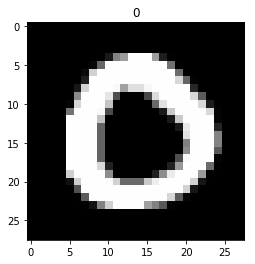

In [4]:
i = 4
image = np.array(data.iloc[i,1:])
image = image.reshape([28, 28])
plt.imshow(image, cmap='gray')
plt.title(data.iloc[i,0])

In [5]:
train_n = 5000
train_labels = np.array(data.iloc[:train_n,0])
train = lil_matrix(np.array(data.iloc[:train_n, 1:]), dtype = 'int32')
train_labels.shape, train.shape

((5000,), (5000, 784))

In [6]:
test_n = 10000
test_labels = np.array(data.iloc[train_n : train_n + test_n, 0])
test = lil_matrix(np.array(data.iloc[train_n : train_n + test_n, 1:]), dtype = 'int32')
test_labels.shape, test.shape

((10000,), (10000, 784))

In [7]:
clf = svm.SVC(gamma='scale')
clf.fit(train, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
clf.score(test, test_labels)

0.1534

The first score was 15.3%

# Now let's convert the pixels to binary

In [141]:
data_simple = (np.array(data)[:,1:] >= 120).astype(int)
data_simple.shape

(42000, 784)

Text(0.5, 1.0, '4')

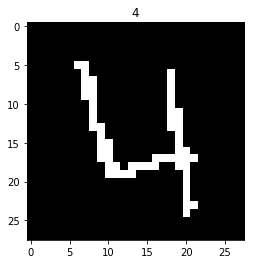

In [142]:
i = 3
image = data_simple[i,:]
image = image.reshape([28, 28])
plt.imshow(image, cmap='gray')
plt.title(data.iloc[i,0])

In [215]:
train_n = 32000
train_labels = np.array(data.iloc[:train_n,0])
train = data_simple[:train_n]
train_labels.shape, train.shape

((32000,), (32000, 784))

In [216]:
test_n = 10000
test_labels = np.array(data.iloc[train_n : train_n + test_n, 0])
test = data_simple[train_n : train_n + test_n]
test_labels.shape, test.shape

((10000,), (10000, 784))

In [145]:
clf2 = svm.SVC(gamma='scale')
clf2.fit(train, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [146]:
clf2.score(test, test_labels)

0.9228

With a pixel treshold of 120 the score jumped to 92.28%!!!

With threshold in 0 the score is 92.26%

With threshold in 200 it decreases to 90%

# Now let's try by applying pca previously

In [229]:
pca = PCA(0.70)
pca.fit(train)
pca.n_components_

43

In [230]:
train_pca = pca.transform(train)
test_pca = pca.transform(test)
train_pca.shape, test_pca.shape

((32000, 43), (10000, 43))

In [231]:
clf3 = svm.SVC(gamma='scale')
clf3.fit(train_pca, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [232]:
clf3.score(test_pca, test_labels)

0.9785

With pca at 95% we obtain a score of 93.66%!!!

At 90% confidence it goes up to 94.09%

At 80% confidence it goes up to 94.99%!!!

At 60% confidence we get a score of 95.41%!!!!!

It starts going down after that...

With 70% confidence and with the 32000 entries on the training set the accuracy goes up to **97.85%**